In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns


## 1
Note that $r(x) = \frac{p(x)}{q(x)}$ 
$$
D_f(p||q) = \int q(x) f\big((r(x)\big)dx = -\int q(x) h\big(\log r(x) \big)dx
$$
Therefore, $$f\big(r\big) = - h\big(\log r \big)$$
For example, KL divergence, $f(r) = -\log r, h(\log r) = \log r$

Let $h(\log r) = \exp(1.5\log r) = ar^2$, So we have $f(r)= -ar^2$, $h$ is increasing but $f$ is concave

In [2]:
def f(r, method='Rkl'):
    if method=='Rkl':
        return -torch.log(r)
    elif method=='Fkl':
        return r*torch.log(r)
    elif method=='Chi':
        return (r-1)**2
    elif method=='Hellinger':
        return (torch.sqrt(r)-1)**2
    elif method=='Js':
        return -(r+1)*torch.log((1+r)/2) + r*torch.log(r)

def h(logr, method='Exp'):
    if method=='Exp':
        return torch.exp(1.5*logr)
    elif method=='Arcsinh':
        return torch.arcsinh(logr**3)
    elif method=='Tanh':
        return torch.tanh(logr**3)
    elif method=='ns':
        return torch.log(torch.sigmoid(logr))

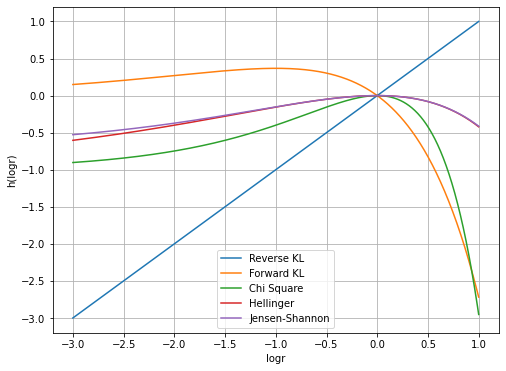

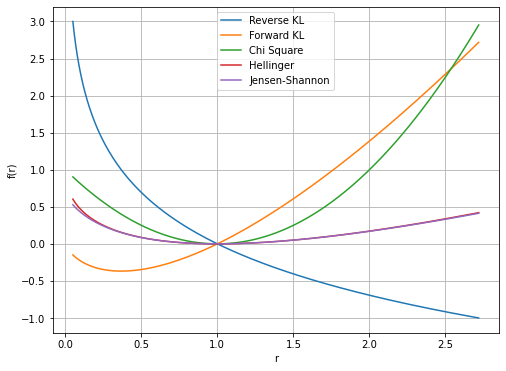

In [3]:
logr = torch.linspace(-3, 1, 1000)
r = torch.exp(logr)
#hlogr = torch.exp(1.5*logr)
#fr = -hlogr


fig, ax = plt.subplots(figsize=(8,6))
fr = f(r, method='Rkl')
plt.plot(logr, -fr, label='Reverse KL')

fr = f(r, method='Fkl')
plt.plot(logr, -fr, label='Forward KL')

fr = f(r, method='Chi')
plt.plot(logr, -fr, label='Chi Square')

fr = f(r, method='Hellinger')
plt.plot(logr, -fr, label='Hellinger')

fr = f(r, method='Js')
plt.plot(logr, -fr, label='Jensen-Shannon')

plt.xlabel('logr')
plt.ylabel('h(logr)')
plt.legend()
plt.grid()
plt.show()

plt.show()


fig, ax = plt.subplots(figsize=(8,6))
fr = f(r, method='Rkl')
plt.plot(r, fr, label='Reverse KL')

fr = f(r, method='Fkl')
plt.plot(r, fr, label='Forward KL')

fr = f(r, method='Chi')
plt.plot(r, fr, label='Chi Square')

fr = f(r, method='Hellinger')
plt.plot(r, fr, label='Hellinger')

fr = f(r, method='Js')
plt.plot(r, fr, label='Jensen-Shannon')

plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.grid()

plt.show()

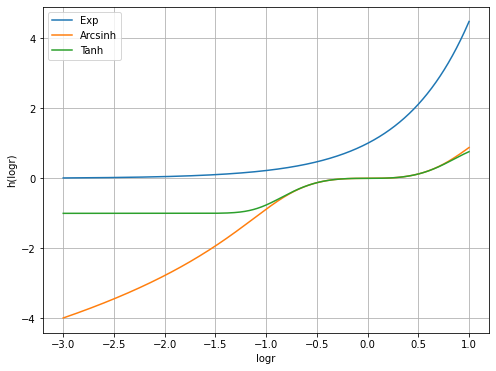

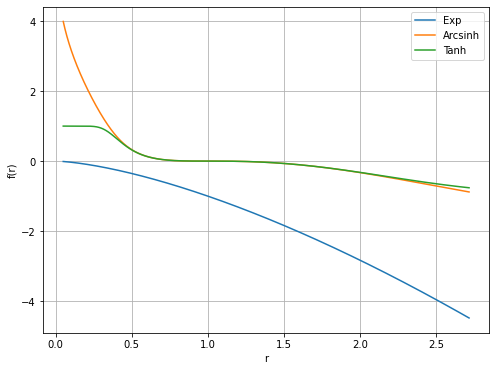

In [4]:
logr = torch.linspace(-3, 1, 1000)
r = torch.exp(logr)
fig, ax = plt.subplots(figsize=(8,6))
hlogr = h(logr, method='Exp')
plt.plot(logr, hlogr, label='Exp')

hlogr = h(logr, method='Arcsinh')
plt.plot(logr, hlogr, label='Arcsinh')

hlogr = h(logr, method='Tanh')
plt.plot(logr, hlogr, label='Tanh')


plt.xlabel('logr')
plt.ylabel('h(logr)')
plt.legend()
plt.grid()
plt.show()

plt.show()


fig, ax = plt.subplots(figsize=(8,6))
hlogr = h(logr, method='Exp')
plt.plot(r, -hlogr, label='Exp')

hlogr = h(logr, method='Arcsinh')
plt.plot(r, -hlogr, label='Arcsinh')

hlogr = h(logr, method='Tanh')
plt.plot(r, -hlogr, label='Tanh')




plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.grid()

plt.show()

## 2
Let that $r(x) = \frac{p(x)}{q(x)}$ 
$$
D_{f_{rev}}(q||p) = \int p(x) f_{rev}\big((1/r(x)\big)dx =\int q(x)r(x) f_{rev}\big((1/r(x)\big)dx = -\int q(x) h\big(\log r(x) \big)dx
$$
Therefore, $$rf_{rev}\big(\frac{1}{r}\big) = - h\big(\log r \big)$$


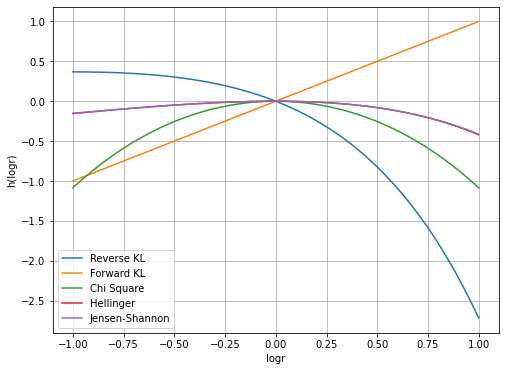

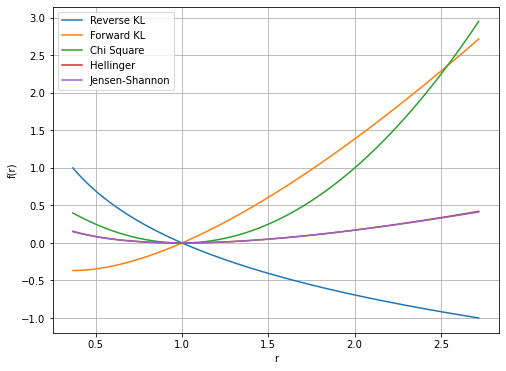

In [5]:
logr = torch.linspace(-1, 1, 1000)
r = torch.exp(logr)



fig, ax = plt.subplots(figsize=(8,6))
frev_r = f(1/r, method='Rkl')
plt.plot(logr, -r*frev_r, label='Reverse KL')

frev_r = f(1/r, method='Fkl')
plt.plot(logr, -r*frev_r, label='Forward KL')

frev_r = f(1/r, method='Chi')
plt.plot(logr, -r*frev_r, label='Chi Square')

frev_r = f(1/r, method='Hellinger')
plt.plot(logr, -r*frev_r, label='Hellinger')

frev_r = f(1/r, method='Js')
plt.plot(logr, -r*frev_r, label='Jensen-Shannon')

plt.xlabel('logr')
plt.ylabel('h(logr)')
plt.legend()
plt.grid()
plt.show()

plt.show()


fig, ax = plt.subplots(figsize=(8,6))
frev_r = f(1/r, method='Rkl')
plt.plot(1/r, frev_r, label='Reverse KL')

frev_r = f(1/r, method='Fkl')
plt.plot(1/r, frev_r, label='Forward KL')

frev_r = f(1/r, method='Chi')
plt.plot(1/r, frev_r, label='Chi Square')

frev_r = f(1/r, method='Hellinger')
plt.plot(1/r, frev_r, label='Hellinger')

frev_r = f(1/r, method='Js')
plt.plot(1/r, frev_r, label='Jensen-Shannon')

plt.xlabel('r')
plt.ylabel('f(r)')
plt.legend()
plt.grid()

plt.show()

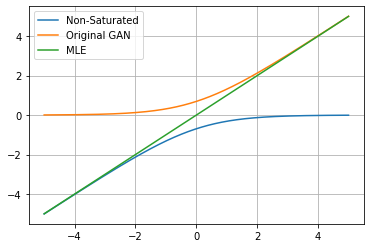

In [10]:
logr = torch.linspace(-5, 5, 1000)
ns = torch.log(torch.sigmoid(logr))
ori = -torch.log(1-torch.sigmoid(logr))
mle = logr

plt.plot(logr, ns, label='Non-Saturated')

plt.plot(logr, ori, label='Original GAN')

plt.plot(logr, mle, label='MLE')
plt.legend()
plt.grid()

plt.show()